In [1]:
from torch_geometric.datasets import FacebookPagePage

dataset = FacebookPagePage(root="../data/Facebook/")
data = dataset[0]

/Users/air/Desktop/Jacob/venv/lib/python3.11/site-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load

In [2]:
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

Number of features: 128
Number of classes: 4
Number of nodes: 22470
Number of edges: 342004


In [3]:
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# experiment 1

Run 4 models for 128 features and 4 classes. 100 epochs of training.
1. Multi Layer Perceptron (128,16,4)


In [4]:
from myNN import MLP, GCN, GAT

In [5]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)
mlp.fit(data, epochs=100)
acc = mlp.test(data)
print(f'MLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=128, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=4, bias=True)
)
Epoch   0 | Train Loss: 1.395 | Train Acc: 22.02% | Val Loss 1.40 | Val Acc: 21.31% 
Epoch  20 | Train Loss: 0.665 | Train Acc: 73.94% | Val Loss 0.69 | Val Acc: 72.14% 
Epoch  40 | Train Loss: 0.576 | Train Acc: 77.15% | Val Loss 0.61 | Val Acc: 75.64% 
Epoch  60 | Train Loss: 0.546 | Train Acc: 78.17% | Val Loss 0.60 | Val Acc: 75.84% 
Epoch  80 | Train Loss: 0.528 | Train Acc: 78.69% | Val Loss 0.61 | Val Acc: 75.59% 
Epoch 100 | Train Loss: 0.514 | Train Acc: 79.50% | Val Loss 0.61 | Val Acc: 75.49% 
MLP test accuracy: 75.33%


In [6]:
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100)
acc_gcn = gcn.test(data)
print(f'GCN test accuracy: {acc_gcn*100:.2f}%')

GCN(
  (conv1): GCNConv(128, 16)
  (conv2): GCNConv(16, 4)
)
Epoch   0 | Train Loss: 1.445 | Train Acc: 32.99% | Val Loss 1.44 | Val Acc: 33.37% 
Epoch  20 | Train Loss: 0.497 | Train Acc: 82.78% | Val Loss 0.49 | Val Acc: 82.99% 
Epoch  40 | Train Loss: 0.363 | Train Acc: 88.42% | Val Loss 0.36 | Val Acc: 88.99% 
Epoch  60 | Train Loss: 0.319 | Train Acc: 89.82% | Val Loss 0.31 | Val Acc: 90.55% 
Epoch  80 | Train Loss: 0.304 | Train Acc: 90.11% | Val Loss 0.29 | Val Acc: 90.85% 
Epoch 100 | Train Loss: 0.289 | Train Acc: 90.72% | Val Loss 0.27 | Val Acc: 91.05% 
GCN test accuracy: 91.09%


In [7]:
from utils import visualize

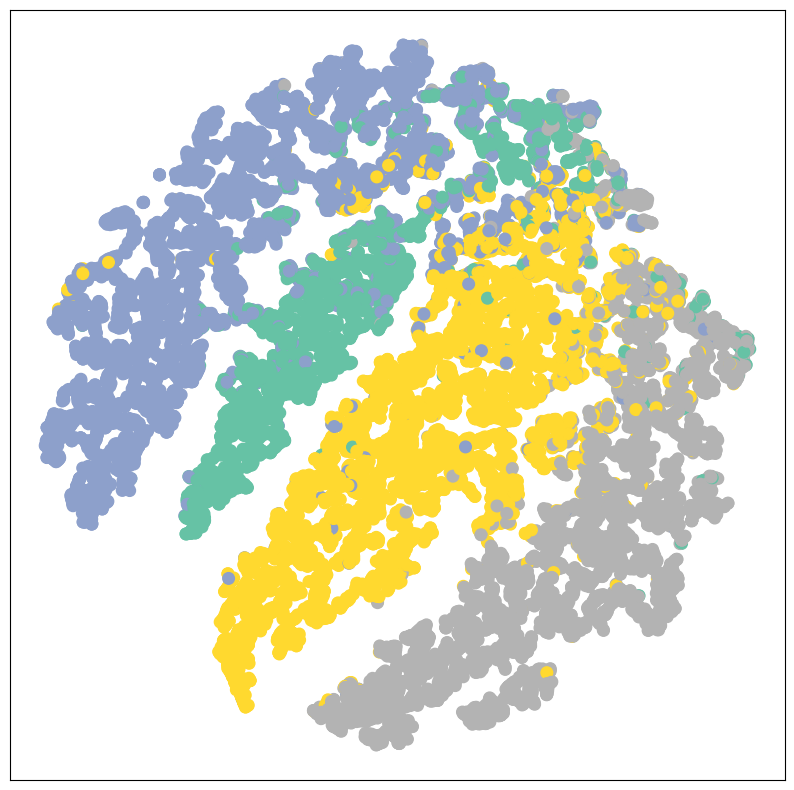

In [8]:
gcn.eval()
out = gcn(data.x, data.edge_index)
visualize(out, color=data.y)

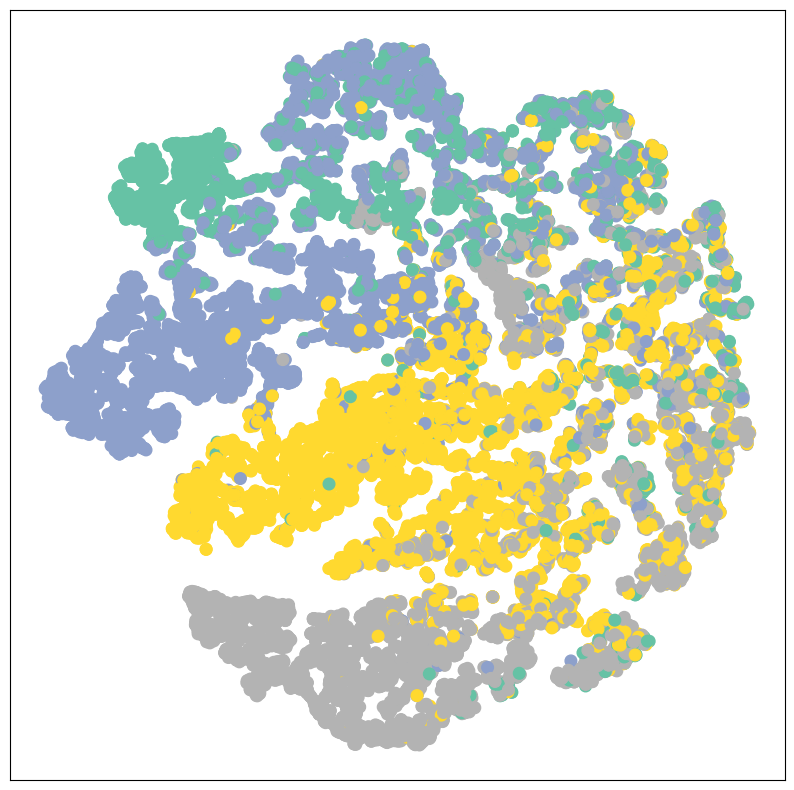

In [9]:
mlp.eval()
out2 = mlp(data.x)
visualize(out2, color=data.y)

In [10]:
gat = GAT(dataset.num_features, 16, dataset.num_classes, heads=8)
print(gat)
gat.fit(data, epochs=100)
acc_gat = gat.test(data)
print(f'GAT test accuracy: {acc_gat*100:.2f}%')

GAT(
  (conv1): GATConv(128, 16, heads=8)
  (conv2): GATConv(128, 4, heads=8)
)
Epoch   0 | Train Loss: 4.255 | Train Acc:  2.64% | Val Loss 4.34 | Val Acc: 2.65% 
Epoch  20 | Train Loss: 0.520 | Train Acc: 82.23% | Val Loss 0.54 | Val Acc: 82.44% 
Epoch  40 | Train Loss: 0.421 | Train Acc: 85.97% | Val Loss 0.44 | Val Acc: 86.14% 
Epoch  60 | Train Loss: 0.366 | Train Acc: 87.92% | Val Loss 0.39 | Val Acc: 87.29% 
Epoch  80 | Train Loss: 0.343 | Train Acc: 88.46% | Val Loss 0.34 | Val Acc: 89.09% 
Epoch 100 | Train Loss: 0.327 | Train Acc: 88.88% | Val Loss 0.36 | Val Acc: 88.09% 
GAT test accuracy: 90.77%


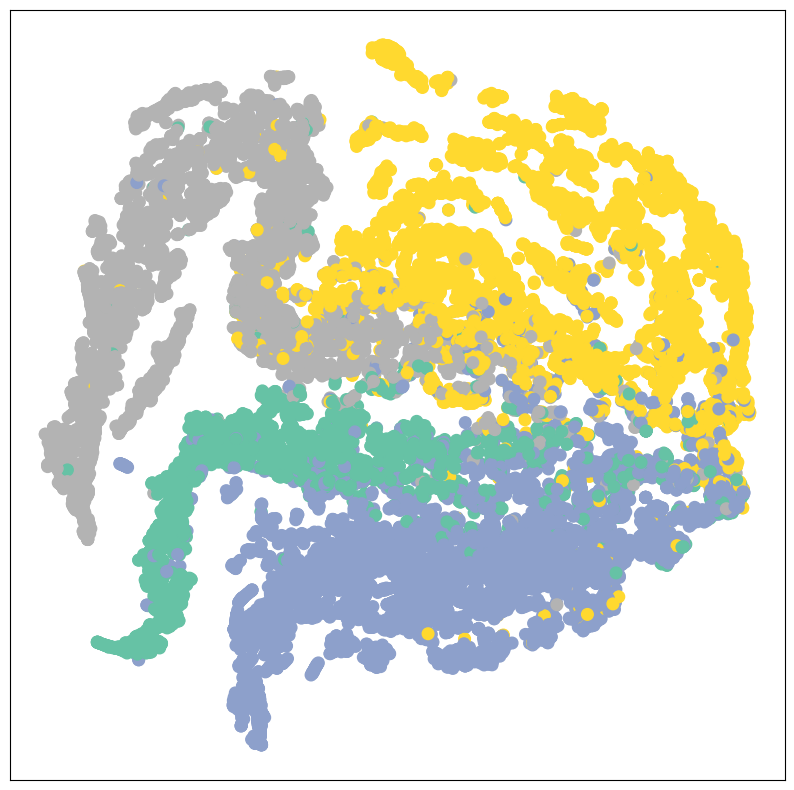

In [11]:
gat.eval()
out3 = gat(data.x,data.edge_index)
visualize(out3, color=data.y)

In [12]:
from utils import to_torch_data
data2 = to_torch_data('../data/edge_facebook.parquet')

In [13]:
data2


Data(edge_index=[2, 341646], num_nodes=22470)

In [14]:
import pyarrow.parquet as pq

In [16]:
df_edges = pq.read_table('../data/edge_facebook.parquet')
df = pq.read_table('../data/facebook.parquet')

In [17]:
df_e = df_edges.to_pandas()
df = df.to_pandas()

In [18]:
import numpy as np

In [19]:
df_e = df_e.apply(lambda x: x-1, axis=1)

df_x = df.drop(columns=['target','node_id']).astype(np.float32)
df_y = df['target'].astype(np.int32)

In [20]:
import torch
edge_index = torch.from_numpy(df_e[["in","out"]].to_numpy())
x = torch.from_numpy(np.array(df_x))
y = torch.from_numpy(np.array(df_y))
y = y.type(torch.LongTensor)

In [21]:
from torch_geometric.data import Data
data3 = Data(x=x, edge_index=edge_index.T, y=y)
# for test 
data4 = Data(x=x, edge_index=data2.edge_index, y=y)

In [22]:
print(f'Number of features: {data3.num_features}')
# print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data3.num_nodes}')
print(f'Number of edges: {data3.num_edges}')

Number of features: 21
Number of nodes: 22470
Number of edges: 170823


In [23]:
print(f'Number of features: {data4.num_features}')
# print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data4.num_nodes}')
print(f'Number of edges: {data4.num_edges}')

Number of features: 21
Number of nodes: 22470
Number of edges: 341646


In [24]:
data3.train_mask = range(18000)
data3.val_mask = range(18001, 20000)
data3.test_mask = range(20001, 22470)

data4.train_mask = range(18000)
data4.val_mask = range(18001, 20000)
data4.test_mask = range(20001, 22470)

In [25]:
from myNN import MLP
mlp = MLP(data3.num_features, 16, 2)
print(mlp)
mlp.fit(data3, epochs=100)
acc = mlp.test(data3)
print(f'MLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=21, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=2, bias=True)
)
Epoch   0 | Train Loss: 1.609 | Train Acc: 25.95% | Val Loss 1.53 | Val Acc: 23.66% 
Epoch  20 | Train Loss: 0.568 | Train Acc: 73.88% | Val Loss 0.56 | Val Acc: 76.54% 
Epoch  40 | Train Loss: 0.542 | Train Acc: 73.94% | Val Loss 0.55 | Val Acc: 76.24% 
Epoch  60 | Train Loss: 0.522 | Train Acc: 73.47% | Val Loss 0.53 | Val Acc: 75.49% 
Epoch  80 | Train Loss: 0.501 | Train Acc: 73.12% | Val Loss 0.52 | Val Acc: 72.54% 
Epoch 100 | Train Loss: 0.476 | Train Acc: 75.79% | Val Loss 0.51 | Val Acc: 71.89% 
MLP test accuracy: 76.39%


In [26]:
from myNN import MLP
mlp2 = MLP(data4.num_features, 16, 2)
print(mlp)
mlp2.fit(data4, epochs=100)
acc2 = mlp2.test(data4)
print(f'MLP test accuracy: {acc2*100:.2f}%')

MLP(
  (linear1): Linear(in_features=21, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=2, bias=True)
)
Epoch   0 | Train Loss: 1.609 | Train Acc: 25.95% | Val Loss 1.53 | Val Acc: 23.66% 
Epoch  20 | Train Loss: 0.568 | Train Acc: 73.88% | Val Loss 0.56 | Val Acc: 76.54% 
Epoch  40 | Train Loss: 0.542 | Train Acc: 73.94% | Val Loss 0.55 | Val Acc: 76.24% 
Epoch  60 | Train Loss: 0.522 | Train Acc: 73.47% | Val Loss 0.53 | Val Acc: 75.49% 
Epoch  80 | Train Loss: 0.501 | Train Acc: 73.12% | Val Loss 0.52 | Val Acc: 72.54% 
Epoch 100 | Train Loss: 0.476 | Train Acc: 75.79% | Val Loss 0.51 | Val Acc: 71.89% 
MLP test accuracy: 76.39%


In [27]:
from myNN import GCN
gcn2 = GCN(data3.num_features, 16, 2)
print(gcn2)
gcn2.fit(data3, epochs=100)
acc_gcn2 = gcn2.test(data3)
print(f'GCN test accuracy: {acc_gcn2*100:.2f}%')

GCN(
  (conv1): GCNConv(21, 16)
  (conv2): GCNConv(16, 2)
)
Epoch   0 | Train Loss: 5.689 | Train Acc: 65.90% | Val Loss 5.47 | Val Acc: 66.93% 
Epoch  20 | Train Loss: 1.717 | Train Acc: 65.05% | Val Loss 1.42 | Val Acc: 65.93% 
Epoch  40 | Train Loss: 0.843 | Train Acc: 70.33% | Val Loss 0.81 | Val Acc: 70.34% 
Epoch  60 | Train Loss: 0.626 | Train Acc: 72.39% | Val Loss 0.60 | Val Acc: 73.64% 
Epoch  80 | Train Loss: 0.565 | Train Acc: 73.90% | Val Loss 0.55 | Val Acc: 76.14% 
Epoch 100 | Train Loss: 0.545 | Train Acc: 73.98% | Val Loss 0.52 | Val Acc: 76.34% 
GCN test accuracy: 75.29%


In [29]:
from myNN import GCN
gcn3 = GCN(data4.num_features, 16, 2)
print(gcn3)
gcn3.fit(data4, epochs=100)
acc_gcn3 = gcn3.test(data4)
print(f'GCN test accuracy: {acc_gcn3*100:.2f}%')

GCN(
  (conv1): GCNConv(21, 16)
  (conv2): GCNConv(16, 2)
)
Epoch   0 | Train Loss: 2.478 | Train Acc: 71.52% | Val Loss 2.04 | Val Acc: 68.53% 
Epoch  20 | Train Loss: 1.115 | Train Acc: 63.71% | Val Loss 1.36 | Val Acc: 57.68% 
Epoch  40 | Train Loss: 0.722 | Train Acc: 68.56% | Val Loss 0.81 | Val Acc: 63.78% 
Epoch  60 | Train Loss: 0.613 | Train Acc: 72.14% | Val Loss 0.63 | Val Acc: 69.78% 
Epoch  80 | Train Loss: 0.593 | Train Acc: 73.44% | Val Loss 0.61 | Val Acc: 73.54% 
Epoch 100 | Train Loss: 0.585 | Train Acc: 73.83% | Val Loss 0.60 | Val Acc: 74.64% 
GCN test accuracy: 74.56%


In [30]:
from myNN import GAT
gat = GAT(data3.num_features, 8, 2, heads=8)
print(gat)
gat.fit(data3, epochs=100)
acc_gat = gat.test(data3)
print(f'GAT test accuracy: {acc_gat*100:.2f}%')

GAT(
  (conv1): GATConv(21, 8, heads=8)
  (conv2): GATConv(64, 2, heads=8)
)
Epoch   0 | Train Loss: 124.120 | Train Acc:  0.83% | Val Loss 158.71 | Val Acc: 0.10% 
Epoch  20 | Train Loss: 2.396 | Train Acc: 62.65% | Val Loss 1.75 | Val Acc: 65.33% 
Epoch  40 | Train Loss: 0.947 | Train Acc: 68.62% | Val Loss 0.69 | Val Acc: 72.64% 
Epoch  60 | Train Loss: 0.701 | Train Acc: 72.43% | Val Loss 0.59 | Val Acc: 76.04% 
Epoch  80 | Train Loss: 0.627 | Train Acc: 73.38% | Val Loss 0.57 | Val Acc: 75.89% 
Epoch 100 | Train Loss: 0.601 | Train Acc: 73.62% | Val Loss 0.56 | Val Acc: 76.34% 
GAT test accuracy: 74.73%


In [31]:
from myNN import GAT
gat2 = GAT(data4.num_features, 8, 2, heads=8)
print(gat2)
gat2.fit(data4, epochs=100)
acc_gat3 = gat2.test(data4)
print(f'GAT test accuracy: {acc_gat3*100:.2f}%')

GAT(
  (conv1): GATConv(21, 8, heads=8)
  (conv2): GATConv(64, 2, heads=8)
)
Epoch   0 | Train Loss: 164.975 | Train Acc:  0.09% | Val Loss 90.22 | Val Acc: 0.30% 
Epoch  20 | Train Loss: 2.197 | Train Acc: 62.52% | Val Loss 2.19 | Val Acc: 61.58% 
Epoch  40 | Train Loss: 0.781 | Train Acc: 65.36% | Val Loss 0.89 | Val Acc: 63.33% 
Epoch  60 | Train Loss: 0.626 | Train Acc: 71.94% | Val Loss 0.63 | Val Acc: 72.89% 
Epoch  80 | Train Loss: 0.592 | Train Acc: 73.54% | Val Loss 0.62 | Val Acc: 74.99% 
Epoch 100 | Train Loss: 0.593 | Train Acc: 73.83% | Val Loss 0.58 | Val Acc: 75.54% 
GAT test accuracy: 74.73%


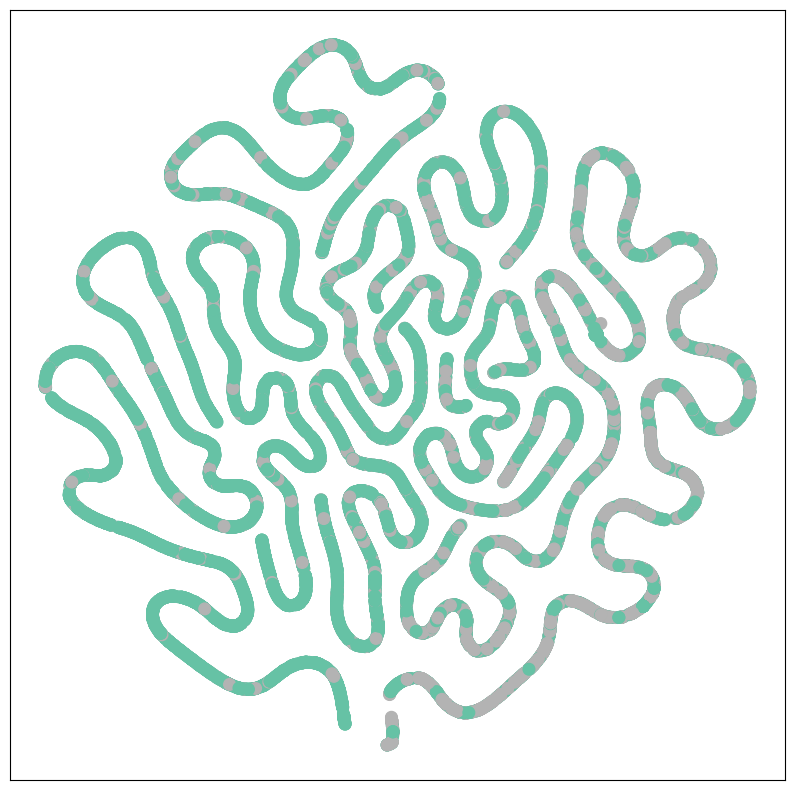

In [32]:
gcn2.eval()
out = gcn2(data3.x, data3.edge_index)
visualize(out, color=data3.y)